In [2]:
# Bivariate- Catogorical and Numeric - Stats using T- test and ANOVA test and Categorical features

from scipy import stats 
import statistics as stat 

# 

edu_PartialHighSchool = [30000,10000, 10000, 20000,70000,30000,10000,20000,10000,30000]
edu_HighSchool = [20000,30000,60000,20000,40000,60000,60000]
edu_PartialCollege = [60000,40000,30000, 130000,60000,40000]
edu_Bachelors = [ 40000,20000,90000,120000,60000,130000,20000,100000,80000,30000,100000,120000]
edu_Graduate = [ 160000,50000,80000,30000,40000,80000,130000,100000,130000,50000,130000]

print(str(int(stat.mean(edu_PartialHighSchool))))
print(str(int(stat.mean(edu_HighSchool))))
print(str(int(stat.mean(edu_PartialCollege))))
print(str(int(stat.mean(edu_Bachelors))))
print(str(int(stat.mean(edu_Graduate))))

24000
41428
60000
75833
89090


In [3]:
t , p = stats.ttest_ind(edu_PartialHighSchool,edu_HighSchool)
print(f't-value:{t}')
print(f'p-value:{p}')

t-value:-1.9131753750607228
p-value:0.07500898731578687


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

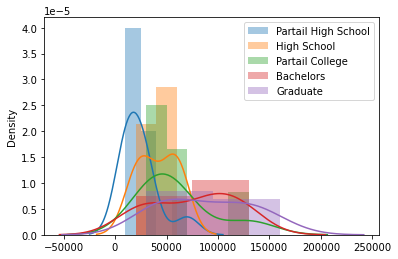

In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.distplot(edu_PartialHighSchool, label = 'Partail High School')
sns.distplot(edu_HighSchool, label = 'High School')
sns.distplot(edu_PartialCollege, label = 'Partail College')
sns.distplot(edu_Bachelors, label = 'Bachelors')
sns.distplot(edu_Graduate, label = 'Graduate')
plt.legend()

In [5]:
f , p = stats.f_oneway(edu_PartialHighSchool,edu_HighSchool,edu_PartialCollege,edu_Bachelors,edu_Graduate)

print(f't-value:{f}')
print(f'p-value:{p}')

t-value:5.778065095961635
p-value:0.0008781084858501968


In [6]:
import pandas as pd 

df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


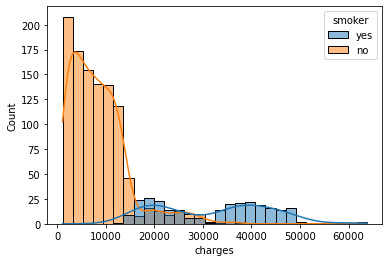

In [7]:
sns.histplot(data = df , x = 'charges',hue='smoker',kde=True);

In [8]:
smoker_y = df[df['smoker']== 'yes']
smoker_n = df[df['smoker']== 'no']

stats.ttest_ind(smoker_y['charges'],smoker_n['charges'])

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

In [9]:
feature = 'smoker'
label = 'charges'

def anova(feateure,label):
    grouped_values = []

    groups = df[feature].unique()
    for group in groups:
        grouped_values.append(df[df[feature] == group][label])
    return stats.f_oneway(*grouped_values)

f,p = anova('smoker','charges')

print(f'f:{f}')
print(f'p:{p}')

f:2177.614868056519
p:8.271435842182967e-283


In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

df = pd.read_csv('http://www.ishelp.info/data/bikebuyers.csv')
df

,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,Age,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,19147,Married,Male,1,0,40000,0,4,1,1,42,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
1,22296,Married,Male,1,0,70000,0,4,1,1,38,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
2,25983,Married,Male,1,0,70000,0,4,1,1,43,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
3,29134,Married,Male,1,0,60000,4,4,5,3,42,0,0,Bachelors,Skilled Manual,No,10+ Miles,North America,No
4,27388,Married,Male,1,0,60000,3,4,2,2,66,0,0,Bachelors,Management,No,1-2 Miles,North America,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14798,Single,Female,0,1,10000,4,1,1,2,41,1,1,Partial High School,Manual,Yes,0-1 Miles,Europe,Yes
996,16259,Single,Female,0,1,10000,4,1,1,2,40,1,1,Partial High School,Manual,Yes,0-1 Miles,Europe,Yes
997,16410,Single,Female,0,1,10000,4,1,1,2,41,1,1,Partial High School,Manual,Yes,0-1 Miles,Europe,Yes
998,28957,Single,Female,0,1,120000,0,1,5,4,34,1,1,Partial High School,Professional,Yes,10+ Miles,Pacific,Yes


In [11]:
df.Education.unique()

array(['Bachelors', 'Graduate Degree', 'High School', 'Partial College',
       'Partial High School'], dtype=object)

In [12]:
df['Education_rank'] = df['Education']
df.Education_rank.replace(['Partial High School','High School','Partial College','Bachelors','Graduate Degree'],[1,2,3,4,5],inplace = True)
df.Education_rank

0      4
1      4
2      4
3      4
4      4
      ..
995    1
996    1
997    1
998    1
999    1
Name: Education_rank, Length: 1000, dtype: int64

In [13]:
df['Commute_rank'] = df['Commute Distance']

df.Commute_rank.replace(['0-1 Miles', '1-2 Miles','2-5 Miles' , '5-10 Miles', '10+ Miles'],[0,1,2,5,10],inplace = True)

df.astype({'Commute_rank':'int64'})

,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,...,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike,Education_rank,Commute_rank
0,19147,Married,Male,1,0,40000,0,4,1,1,...,0,0,Bachelors,Professional,No,0-1 Miles,North America,No,4,0
1,22296,Married,Male,1,0,70000,0,4,1,1,...,0,0,Bachelors,Professional,No,0-1 Miles,North America,No,4,0
2,25983,Married,Male,1,0,70000,0,4,1,1,...,0,0,Bachelors,Professional,No,0-1 Miles,North America,No,4,0
3,29134,Married,Male,1,0,60000,4,4,5,3,...,0,0,Bachelors,Skilled Manual,No,10+ Miles,North America,No,4,10
4,27388,Married,Male,1,0,60000,3,4,2,2,...,0,0,Bachelors,Management,No,1-2 Miles,North America,No,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14798,Single,Female,0,1,10000,4,1,1,2,...,1,1,Partial High School,Manual,Yes,0-1 Miles,Europe,Yes,1,0
996,16259,Single,Female,0,1,10000,4,1,1,2,...,1,1,Partial High School,Manual,Yes,0-1 Miles,Europe,Yes,1,0
997,16410,Single,Female,0,1,10000,4,1,1,2,...,1,1,Partial High School,Manual,Yes,0-1 Miles,Europe,Yes,1,0
998,28957,Single,Female,0,1,120000,0,1,5,4,...,1,1,Partial High School,Professional,Yes,10+ Miles,Pacific,Yes,1,10


In [14]:
def clean_bikebuyers():
    df = pd.read_csv('http://www.ishelp.info/data/bikebuyers.csv',
                     usecols=['Education', 'Commute Distance', 'Purchased Bike', 'Age', 'Home Owner'])

    df['Education_rank'] = df['Education']
    df['Commute_rank'] = df['Commute Distance']

    df.Education_rank.replace(['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree'], 
                              [1, 2, 3, 4, 5], inplace=True)
    df.Commute_rank.replace(['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles'], 
                            [0, 1, 2, 5, 10], inplace=True)
    df['Purchased Bike'].replace(['No', 'Yes'], [0, 1], inplace=True)
    df['Education_rank'].astype('int64')
    df['Commute_rank'].astype('int64')
    df['Purchased Bike'].astype('int64')
    
    return df

In [15]:
df = clean_bikebuyers()
df

,Age,Education,Home Owner,Commute Distance,Purchased Bike,Education_rank,Commute_rank
0,42,Bachelors,No,0-1 Miles,0,4,0
1,38,Bachelors,No,0-1 Miles,0,4,0
2,43,Bachelors,No,0-1 Miles,0,4,0
3,42,Bachelors,No,10+ Miles,0,4,10
4,66,Bachelors,No,1-2 Miles,0,4,1
...,...,...,...,...,...,...,...
995,41,Partial High School,Yes,0-1 Miles,1,1,0
996,40,Partial High School,Yes,0-1 Miles,1,1,0
997,41,Partial High School,Yes,0-1 Miles,1,1,0
998,34,Partial High School,Yes,10+ Miles,1,1,10


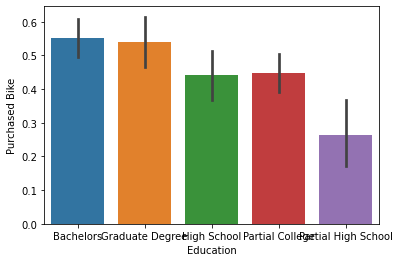

In [16]:
sns.barplot(data = df , x ='Education',y = 'Purchased Bike');

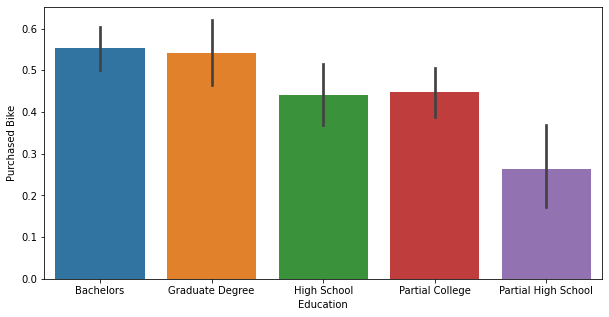

In [17]:
plt.figure(figsize= (10,5))
sns.barplot(data = df , x ='Education',y = 'Purchased Bike');

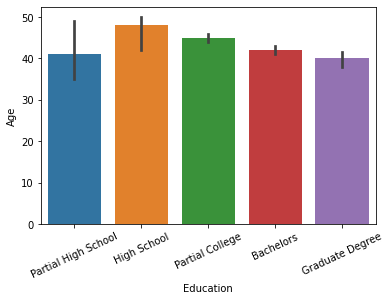

In [18]:
viz = sns.barplot(data = df , x ='Education',y = 'Age',estimator = np.median,
                 order = ['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
viz.set_xticklabels(viz.get_xticklabels(),rotation = 25);

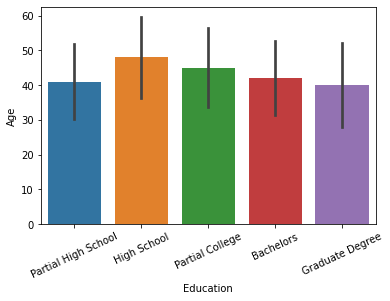

In [19]:
viz = sns.barplot(data = df , x ='Education',y = 'Age',estimator = np.median,ci = 'sd',
                 order = ['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
viz.set_xticklabels(viz.get_xticklabels(),rotation = 25);

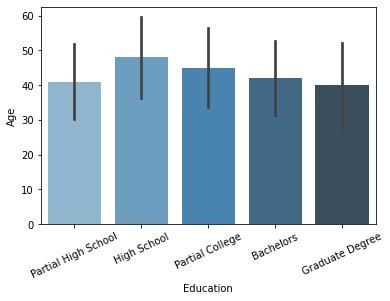

In [20]:
viz = sns.barplot(data = df , x ='Education',y = 'Age',estimator = np.median,ci = 'sd',palette = 'Blues_d',
                 order = ['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
viz.set_xticklabels(viz.get_xticklabels(),rotation = 25);

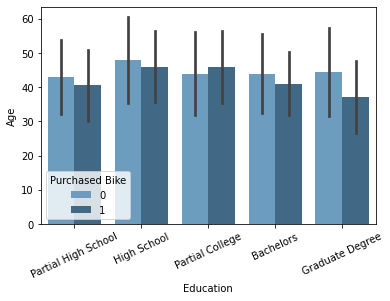

In [21]:
viz = sns.barplot(data = df , x ='Education',y = 'Age', hue = df['Purchased Bike'],estimator = np.median,ci = 'sd',palette = 'Blues_d',
                 order = ['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
viz.set_xticklabels(viz.get_xticklabels(),rotation = 25);

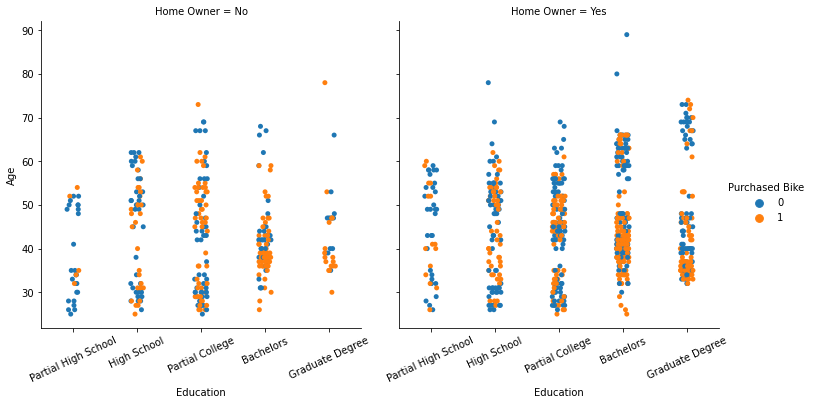

In [22]:
viz = sns.catplot(data = df , x ='Education',y = 'Age', hue = 'Purchased Bike',col = 'Home Owner', estimator = np.median,ci = 'sd',
                 order = ['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
viz.set_xticklabels(rotation = 25);

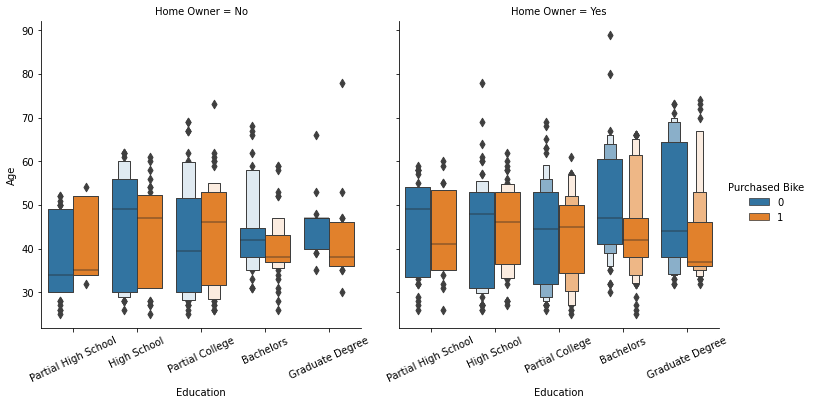

In [23]:
viz = sns.catplot(data = df , x ='Education',y = 'Age', hue = 'Purchased Bike',col = 'Home Owner', estimator = np.median,ci = 'sd',kind = 'boxen',
          order = ['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
viz.set_xticklabels(rotation = 25);

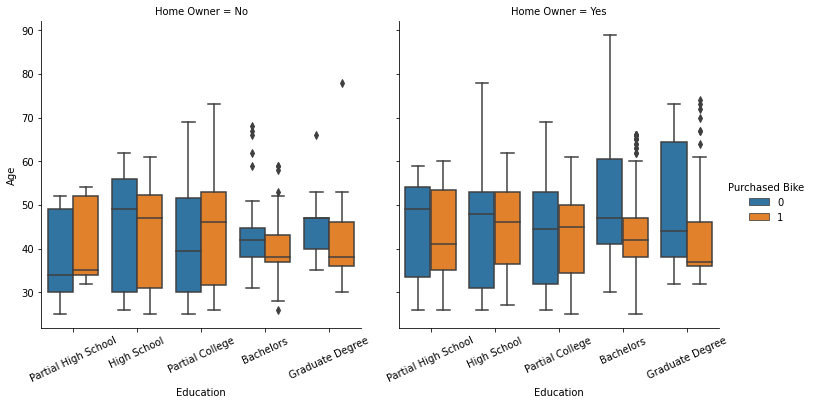

In [24]:
viz = sns.catplot(data = df , x ='Education',y = 'Age', hue = 'Purchased Bike',col = 'Home Owner', estimator = np.median,ci = 'sd',kind = 'box',
          order = ['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
viz.set_xticklabels(rotation = 25);

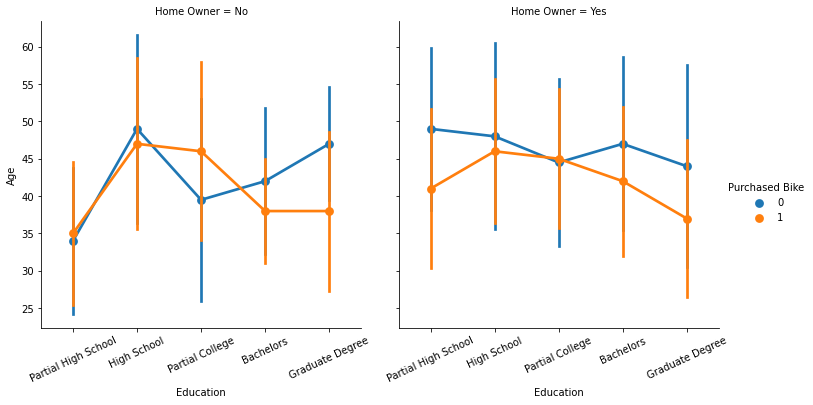

In [25]:
viz = sns.catplot(data = df , x ='Education',y = 'Age', hue = 'Purchased Bike',col = 'Home Owner', estimator = np.median,ci = 'sd',kind = 'point',
          order = ['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
viz.set_xticklabels(rotation = 25);

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


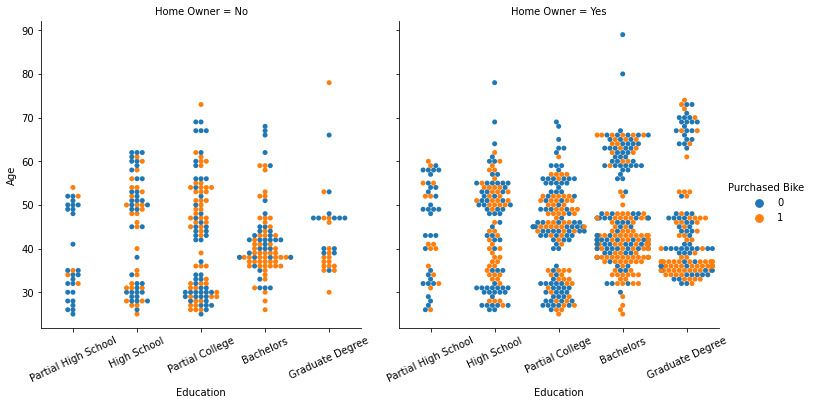

In [26]:
viz = sns.catplot(data = df , x ='Education',y = 'Age', hue = 'Purchased Bike',col = 'Home Owner', estimator = np.median,ci = 'sd',kind = 'swarm',
          order = ['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
viz.set_xticklabels(rotation = 25);

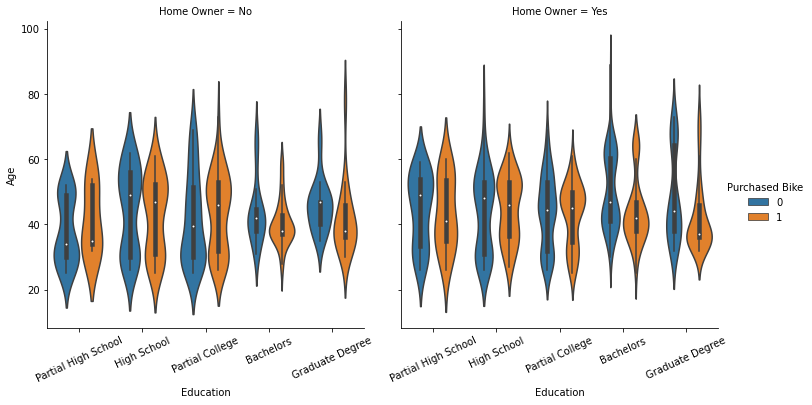

In [27]:
viz = sns.catplot(data = df , x ='Education',y = 'Age', hue = 'Purchased Bike',col = 'Home Owner', estimator = np.median,ci = 'sd',kind = 'violin',
          order = ['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
viz.set_xticklabels(rotation = 25);

# Stacked Bat Charts

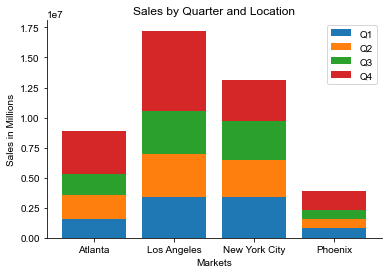

In [28]:
df = pd.DataFrame({'Locations':['Atlanta', 'Los Angeles', 'New York City', 'Phoenix'],
                   'Q1 Sales':[1567811, 3391023, 3409871, 789123], 
                   'Q2 Sales':[1981237, 3609877, 3100098, 810988],
                   'Q3 Sales':[1761231, 3509889, 3209876, 751233],
                   'Q4 Sales':[3578900, 6712333, 3378900, 1500092]})

# Create the positions for the bars
x = np.arange(len(df.Locations))

# Store the three columns from the DataFrame and "flatten" them
# to appear as a regular Python list structure
list_1 = df['Q1 Sales'].values.flatten()
list_2 = df['Q2 Sales'].values.flatten()
list_3 = df['Q3 Sales'].values.flatten()
list_4 = df['Q4 Sales'].values.flatten()

# Plot the bar charts
plt.bar(x,list_1, label='Q1')
plt.bar(x,list_2, bottom=list_1, label='Q2')
plt.bar(x,list_3, bottom=list_1+list_2, label='Q3')
plt.bar(x,list_4, bottom=list_1+list_2+list_3, label='Q4')

# Plot the pokemon names as the x ticks
plt.xticks(x, df.Locations)

# Create a legend
plt.legend(loc='upper right')

# Add labels and title
plt.xlabel('Markets')
plt.ylabel('Sales in Millions')
plt.title('Sales by Quarter and Location')

# Add an SNS style and increase figure size
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 6)})
sns.despine(top=True, right=True)

# Show the plot
plt.show()

In [29]:
df = clean_bikebuyers()
df

,Age,Education,Home Owner,Commute Distance,Purchased Bike,Education_rank,Commute_rank
0,42,Bachelors,No,0-1 Miles,0,4,0
1,38,Bachelors,No,0-1 Miles,0,4,0
2,43,Bachelors,No,0-1 Miles,0,4,0
3,42,Bachelors,No,10+ Miles,0,4,10
4,66,Bachelors,No,1-2 Miles,0,4,1
...,...,...,...,...,...,...,...
995,41,Partial High School,Yes,0-1 Miles,1,1,0
996,40,Partial High School,Yes,0-1 Miles,1,1,0
997,41,Partial High School,Yes,0-1 Miles,1,1,0
998,34,Partial High School,Yes,10+ Miles,1,1,10


# Integrating Statistics

In [52]:
groups = df['Education'].unique()
group_labels = []
for g in groups:
  group_labels.append(df[df['Education'] == g]['Purchased Bike'])

# Now calculate the ANOVA results
F, f_p = stats.f_oneway(*group_labels)

print('F: ' + str(round(F, 4)))
print('f_p: ' + str(round(f_p, 4)))

F: 6.4653
f_p: 0.0


In [31]:
r,p = stats.pearsonr(df['Education_rank'],df['Purchased Bike'])
print('r: ' + str(round(r, 4)))
print('p: ' + str(round(p, 4)))

r: 0.1408
p: 0.0


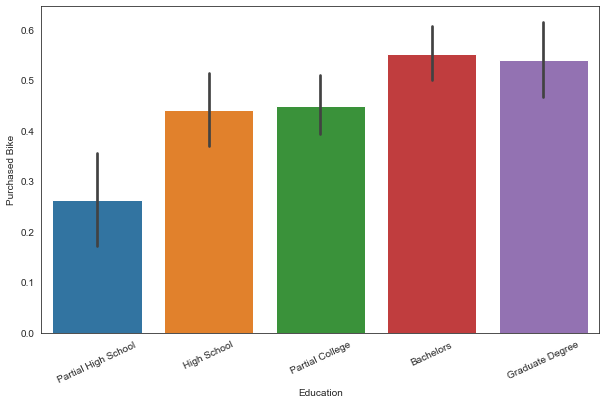

In [32]:
viz = sns.barplot(data = df , x ='Education',y = 'Purchased Bike',
                 order = ['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
viz.set_xticklabels(viz.get_xticklabels(),rotation = 25);

In [33]:
partial_high_school = df[df.Education == 'High School']
high_school = df[df.Education == 'Partial College']
t, p = stats.ttest_ind(partial_high_school['Purchased Bike'], high_school['Purchased Bike'])

print('t: ' + str(round(t, 2)))
print('p: ' + str(round(p, 2)))

t: -0.16
p: 0.87


In [34]:
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['Purchased Bike'],df['Education'])
print(mc.tukeyhsd())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1            group2       meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
      Bachelors     Graduate Degree  -0.0121    0.9 -0.1404  0.1163  False
      Bachelors         High School  -0.1109 0.1206 -0.2381  0.0162  False
      Bachelors     Partial College  -0.1032 0.0941 -0.2166  0.0102  False
      Bachelors Partial High School  -0.2891  0.001 -0.4623 -0.1159   True
Graduate Degree         High School  -0.0989 0.3296 -0.2428   0.045  False
Graduate Degree     Partial College  -0.0912 0.3235  -0.223  0.0407  False
Graduate Degree Partial High School  -0.2771  0.001 -0.4629 -0.0913   True
    High School     Partial College   0.0077    0.9  -0.123  0.1385  False
    High School Partial High School  -0.1782 0.0656 -0.3632  0.0068  False
Partial College Partial High School  -0.1859 0.0322 -0.3617 -0.0101   True
-------------------------

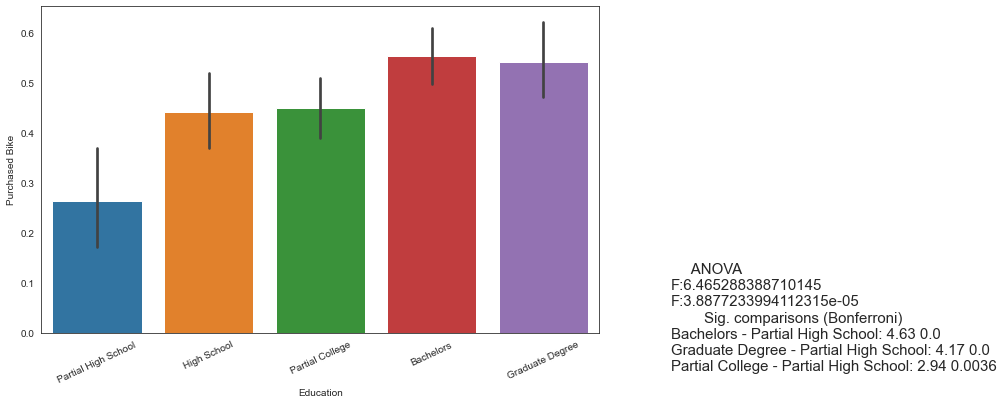

In [64]:
e_types = df.Education.unique()
ttests = []

for i,e in enumerate(e_types):
    for i2 , e2 in enumerate(e_types):
        if i2 > i:
            g1 = df[df.Education == e]['Purchased Bike']
            g2 = df[df.Education == e2]['Purchased Bike']
            t,p = stats.ttest_ind(g1,g2)
            
            ttests.append([f'{e} - {e2}:', t.round(2) , p.round(4)])

textstr = f'     ANOVA \n'
textstr += f'F:{F}\n'
textstr += f'F:{f_p}\n'
textstr += f'        Sig. comparisons (Bonferroni)\n'


# print(f'T-Tests below')
#print(ttests)
threshold = 0.05 / len(ttests)
for t in ttests:
    if t[2] <= threshold:
        textstr += f'{t[0]} {t[1]} {t[2]}\n'
#         print(t)
viz = sns.barplot(data = df , x ='Education',y = 'Purchased Bike',
                 order = ['Partial High School', 'High School', 'Partial College', 'Bachelors', 'Graduate Degree']);
viz.set_xticklabels(viz.get_xticklabels(),rotation = 25);
plt.text(1,0,textstr,fontsize = 15 ,transform=plt.gcf().transFigure);